In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rc('legend',fontsize=14)

# Nz's cov

In [2]:
def make_sym(A):
    return np.maximum(A, A.transpose())

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [3]:
covs = np.load("../../data/DESY1/Nzs/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz")
s = sacc.Sacc().load_fits("../../data/DESY1/Nzs/DESwl_final_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits")
z_DESwl__0_e = s.tracers["DESwl__0"].z
dndz_DESwl__0_e = (s.tracers["DESwl__0"].nz*np.mean(np.diff(s.tracers["DESwl__0"].z)))
z_DESwl__1_e = s.tracers["DESwl__1"].z
dndz_DESwl__1_e = (s.tracers["DESwl__1"].nz*np.mean(np.diff(s.tracers["DESwl__1"].z)))
z_DESwl__2_e = s.tracers["DESwl__2"].z
dndz_DESwl__2_e = (s.tracers["DESwl__2"].nz*np.mean(np.diff(s.tracers["DESwl__2"].z)))
z_DESwl__3_e = s.tracers["DESwl__3"].z
dndz_DESwl__3_e = (s.tracers["DESwl__3"].nz*np.mean(np.diff(s.tracers["DESwl__3"].z)))

nz_DESwl__0_e = (z_DESwl__0_e, dndz_DESwl__0_e)
nz_DESwl__1_e = (z_DESwl__1_e, dndz_DESwl__1_e)
nz_DESwl__2_e = (z_DESwl__2_e, dndz_DESwl__2_e)
nz_DESwl__3_e = (z_DESwl__3_e, dndz_DESwl__3_e)

In [4]:
nzs_covs = {"DESY1wl__0": make_sym(covs['cov_nz'][:100][:, :100]), 
            "DESY1wl__1": make_sym(covs['cov_nz'][100:200][:, 100:200]),
            "DESY1wl__2": make_sym(covs['cov_nz'][200:300][:, 200:300]),
            "DESY1wl__3": make_sym(covs['cov_nz'][300:400][:, 300:400])}

/tmp/ipykernel_339/95440055.py:7: RuntimeWarning: divide by zero encountered in log
  im = axis[i].imshow(np.log(abs(nzs_covs[cov])),


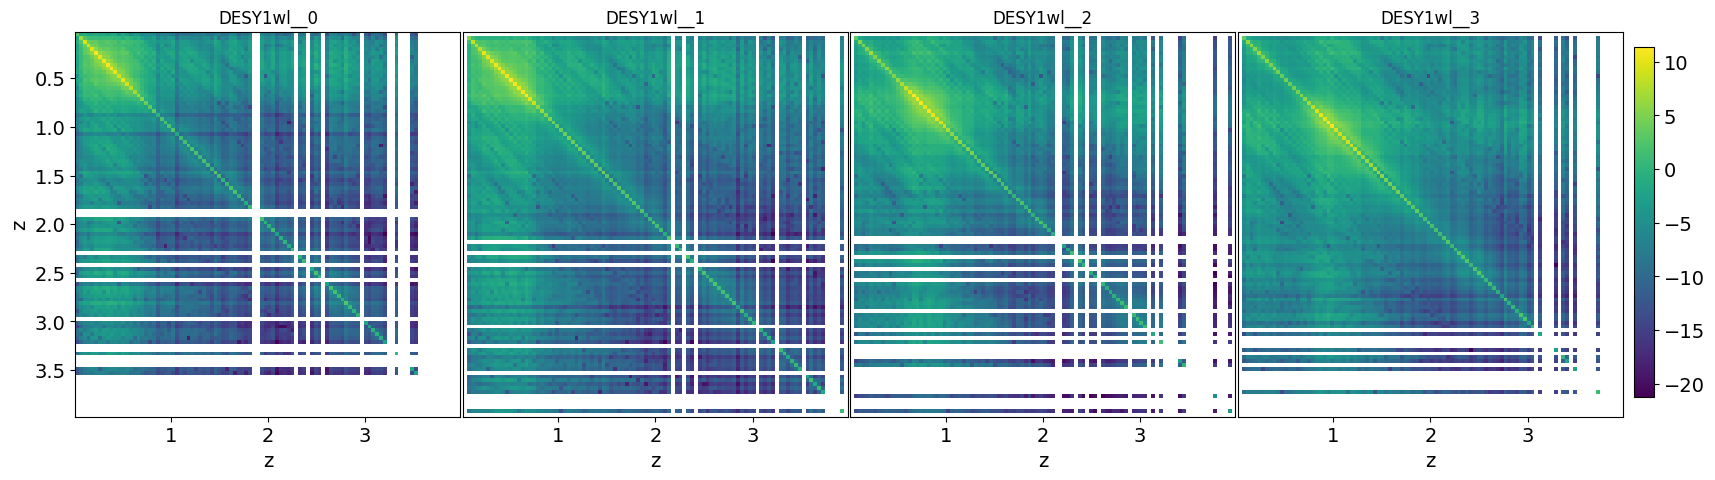

In [5]:
figure, axis = plt.subplots(1, 4, figsize=(20,5))
figure.subplots_adjust(wspace=0)
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nz_DESwl__0_e[0]
    zmin, zmax = z[0], z[99]
    im = axis[i].imshow(np.log(abs(nzs_covs[cov])),
                        extent=[zmin, zmax, zmax, zmin])
    axis[i].set_title(cov)
    if i > 0:
        axis[i].set_yticks([])
    else:
        axis[i].set_ylabel("z")
    axis[i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.01, 0.7])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

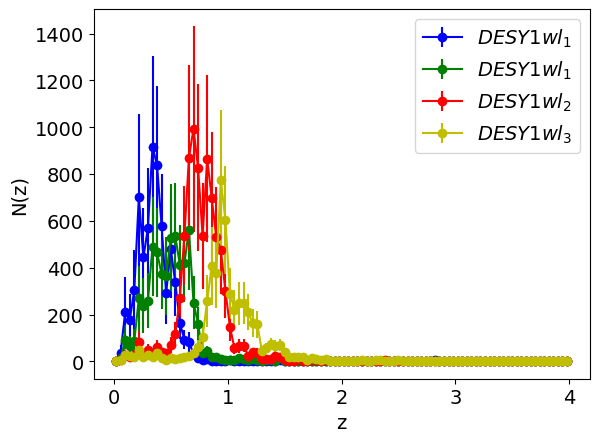

In [6]:
plt.errorbar(nz_DESwl__0_e[0], nz_DESwl__0_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__0"])),
             fmt='bo-', label="$DESY1wl_1$")

plt.errorbar(nz_DESwl__1_e[0], nz_DESwl__1_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__1"])),
             fmt='go-', label="$DESY1wl_1$")

plt.errorbar(nz_DESwl__2_e[0],  nz_DESwl__2_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__2"])),
             fmt='ro-', label="$DESY1wl_2$")

plt.errorbar(nz_DESwl__3_e[0], nz_DESwl__3_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__3"])),
             fmt='yo-', label="$DESY1wl_3$")

plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/binned_covs.pdf', bbox_inches='tight',  pad_inches=0)

In [7]:
np.savez("../../data/DESY1/Nzs/nz_DESwl__0_e.npz",
         z=nz_DESwl__0_e[0], dndz=nz_DESwl__0_e[1], cov=nzs_covs["DESY1wl__0"])

np.savez("../../data/DESY1/Nzs/nz_DESwl__1_e.npz",
         z=nz_DESwl__1_e[0], dndz=nz_DESwl__1_e[1], cov=nzs_covs["DESY1wl__1"])
np.savez("../../data/DESY1/Nzs/nz_DESwl__2_e.npz",
         z=nz_DESwl__2_e[0], dndz=nz_DESwl__2_e[1], cov=nzs_covs["DESY1wl__2"])

np.savez("../../data/DESY1/Nzs/nz_DESwl__3_e.npz",
         z=nz_DESwl__3_e[0], dndz=nz_DESwl__3_e[1], cov=nzs_covs["DESY1wl__3"])

## Binning

In [8]:
norm_0 = np.sum(dndz_DESwl__0_e)
norm_1 = np.sum(dndz_DESwl__1_e)
norm_2 = np.sum(dndz_DESwl__2_e)
norm_3 = np.sum(dndz_DESwl__3_e)

nz_DESwl__0_e = (z_DESwl__0_e[0:40], (dndz_DESwl__0_e/norm_0)[0:40])
nz_DESwl__1_e = (z_DESwl__1_e[1:41], (dndz_DESwl__1_e/norm_1)[1:41])
nz_DESwl__2_e = (z_DESwl__2_e[1:41], (dndz_DESwl__2_e/norm_2)[1:41])
nz_DESwl__3_e = (z_DESwl__3_e[1:41], (dndz_DESwl__3_e/norm_3)[1:41])

nzs_covs = {"DESY1wl__0": make_sym(covs['cov_nz'][:100][:, :100][:40][:,:40]/norm_0**2), 
            "DESY1wl__1": make_sym(covs['cov_nz'][100:200][:, 100:200][1:41][:,1:41]/norm_1**2),
            "DESY1wl__2": make_sym(covs['cov_nz'][200:300][:, 200:300][1:41][:,1:41]/norm_2**2),
            "DESY1wl__3": make_sym(covs['cov_nz'][300:400][:, 300:400][1:41][:,1:41]/norm_3**2)}

In [9]:
m = 40
#zs_k0_bins = np.mean(nz_DESwl__0_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k1_bins = np.mean(nz_DESwl__1_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k2_bins = np.mean(nz_DESwl__2_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k3_bins = np.mean(nz_DESwl__3_e[0][:m].reshape(m_bins, m // m_bins),1)

#nz_k0_bins = np.mean(nz_DESwl__0_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k1_bins = np.mean(nz_DESwl__1_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k2_bins = np.mean(nz_DESwl__2_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k3_bins = np.mean(nz_DESwl__3_e[1][:m].reshape(m_bins, m // m_bins),1)

#cov_k0_bins = (m_bins/m)*nzs_covs["DESY1wl__0"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k1_bins = (m_bins/m)*nzs_covs["DESY1wl__1"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k2_bins = (m_bins/m)*nzs_covs["DESY1wl__2"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k3_bins = (m_bins/m)*nzs_covs["DESY1wl__3"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)

#corr_k0_bins = cov_k0_bins / np.outer(np.sqrt(np.diag(cov_k0_bins)), np.sqrt(np.diag(cov_k0_bins)))
#corr_k1_bins = cov_k1_bins / np.outer(np.sqrt(np.diag(cov_k1_bins)), np.sqrt(np.diag(cov_k1_bins)))
#corr_k2_bins = cov_k2_bins / np.outer(np.sqrt(np.diag(cov_k2_bins)), np.sqrt(np.diag(cov_k2_bins)))
#corr_k3_bins = cov_k3_bins / np.outer(np.sqrt(np.diag(cov_k3_bins)), np.sqrt(np.diag(cov_k3_bins)))


if os.path.isdir("../../data/DESY1/binned_{}_nzs".format(m))==False:
    os.mkdir("../../data/DESY1/binned_{}_nzs".format(m))

np.savez("../../data/DESY1/binned_{}_nzs/nz_DESwl__0_e.npz".format(m),
         z=nz_DESwl__0_e[0], dndz=nz_DESwl__0_e[1], cov=nzs_covs["DESY1wl__0"])
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESwl__1_e.npz".format(m),
         z=nz_DESwl__1_e[0], dndz=nz_DESwl__1_e[1], cov=nzs_covs["DESY1wl__1"])
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESwl__2_e.npz".format(m),
         z=nz_DESwl__2_e[0], dndz=nz_DESwl__2_e[1], cov=nzs_covs["DESY1wl__2"])
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESwl__3_e.npz".format(m),
         z=nz_DESwl__3_e[0], dndz=nz_DESwl__3_e[1], cov=nzs_covs["DESY1wl__3"])

## Plotting

In [10]:
nzs = {"DESY1wl__0": np.load("../../data/DESY1/binned_40_nzs/nz_DESwl__0_e.npz"), 
       "DESY1wl__1": np.load("../../data/DESY1/binned_40_nzs/nz_DESwl__1_e.npz"),
        "DESY1wl__2": np.load("../../data/DESY1/binned_40_nzs/nz_DESwl__2_e.npz"),
        "DESY1wl__3": np.load("../../data/DESY1/binned_40_nzs/nz_DESwl__3_e.npz")}

In [12]:
np.sqrt(np.diag(nzs["DESY1wl__0"]["cov"])) 

array([7.95475989e-04, 5.38085796e-03, 2.35540015e-02, 1.73941235e-02,
       2.66287457e-02, 5.59477698e-02, 3.33444098e-02, 4.02418332e-02,
       6.10245124e-02, 5.32260676e-02, 3.54068738e-02, 2.11185468e-02,
       3.30027252e-02, 2.26192302e-02, 1.11482359e-02, 6.37262240e-03,
       6.49991673e-03, 2.87125643e-03, 1.51866944e-03, 9.90662367e-04,
       1.09590615e-03, 1.76539302e-04, 5.82509980e-04, 4.89339713e-04,
       6.22680930e-04, 7.45316537e-04, 8.58856262e-05, 3.92182963e-04,
       4.38044353e-04, 5.68939724e-04, 5.22091476e-04, 4.99425391e-04,
       3.23844895e-04, 4.82464341e-04, 3.91756869e-04, 1.92610495e-04,
       9.24764019e-04, 4.20371813e-04, 1.71364304e-04, 2.39112487e-04])

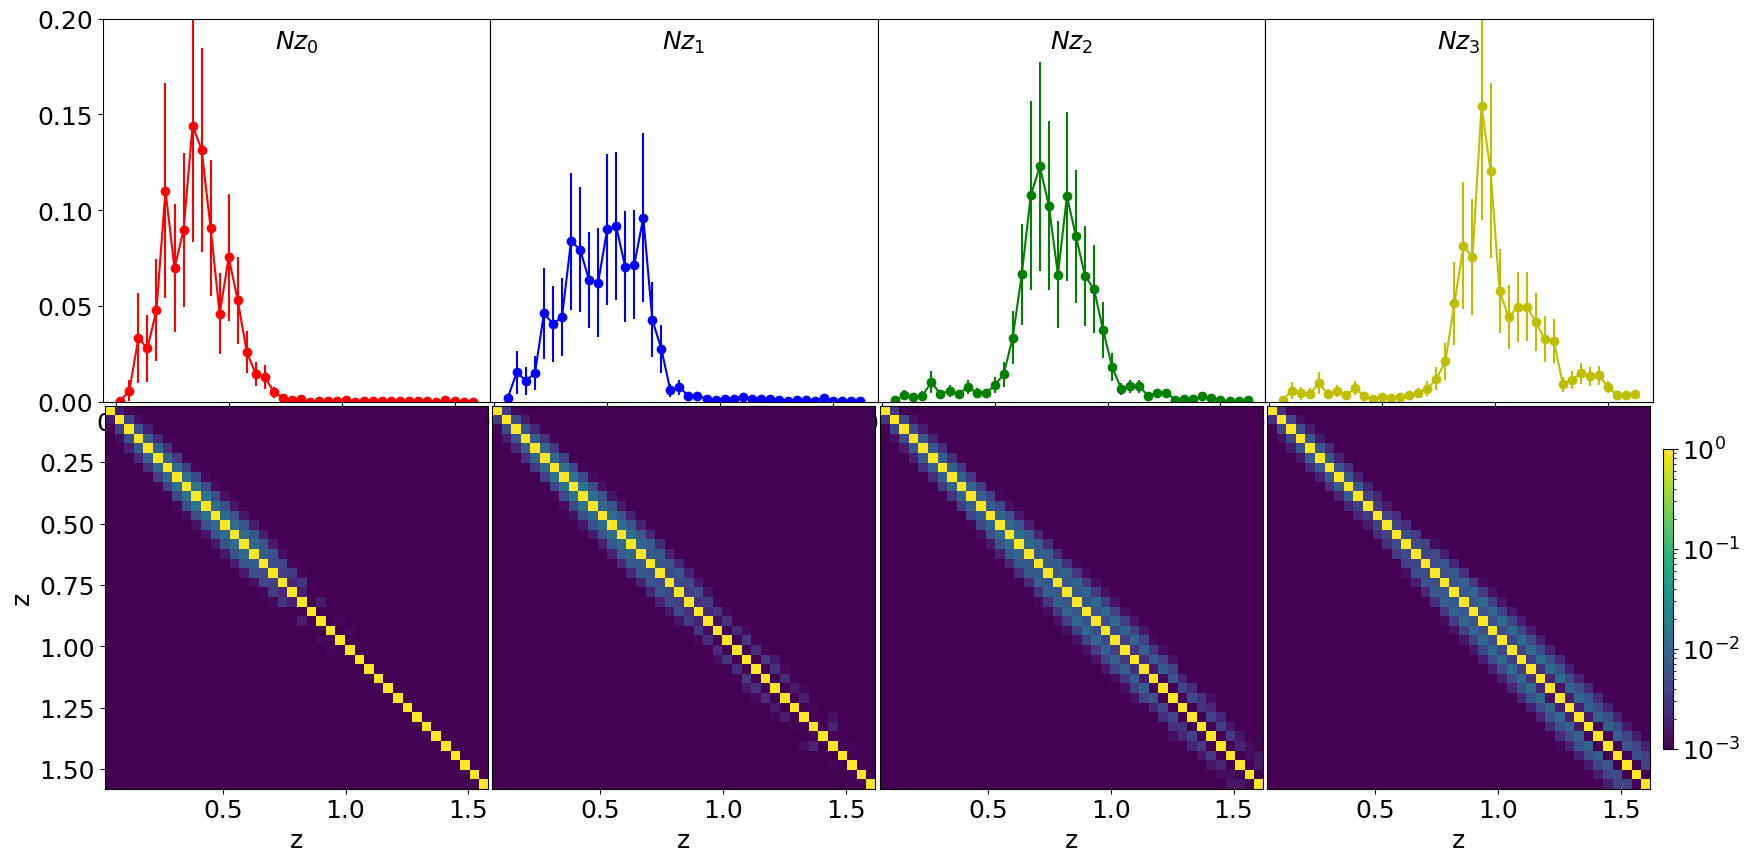

In [66]:
from matplotlib.colors import LogNorm
colorss = ["r", "b", "g", "y"]
figure, axis = plt.subplots(2, 4, figsize=(20,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(0, len(nzs_covs.keys())):
    nzzs = nzs["DESY1wl__{}".format(i)]
    axis[0 , i].errorbar(nzzs['z'], nzzs['dndz'],
             yerr=np.sqrt(np.diag(nzzs["cov"])), fmt='{}o-'.format(colorss[i]), label="$DESY1wl_{}$".format(i))
    axis[0, i].set_ylim(0, 0.2)
    axis[0, i].set_title(r"$Nz_{}$".format(i), y=0.9)
    if i > 0:
        axis[0, i].set_yticks([])
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nzs[cov]["z"]
    err = np.sqrt(np.diag(nzs[cov]["cov"]))
    corr = nzs[cov]["cov"] / (np.outer(err, err))
    im = axis[1, i].imshow(abs(corr), norm=LogNorm(vmin=0.001, vmax=1),
                           extent=[min(z), max(z), max(z), min(z)])
    if i > 0:
        axis[1, i].set_yticks([])
    else:
        axis[1, i].set_ylabel("z")
    axis[1, i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.005, 0.3])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

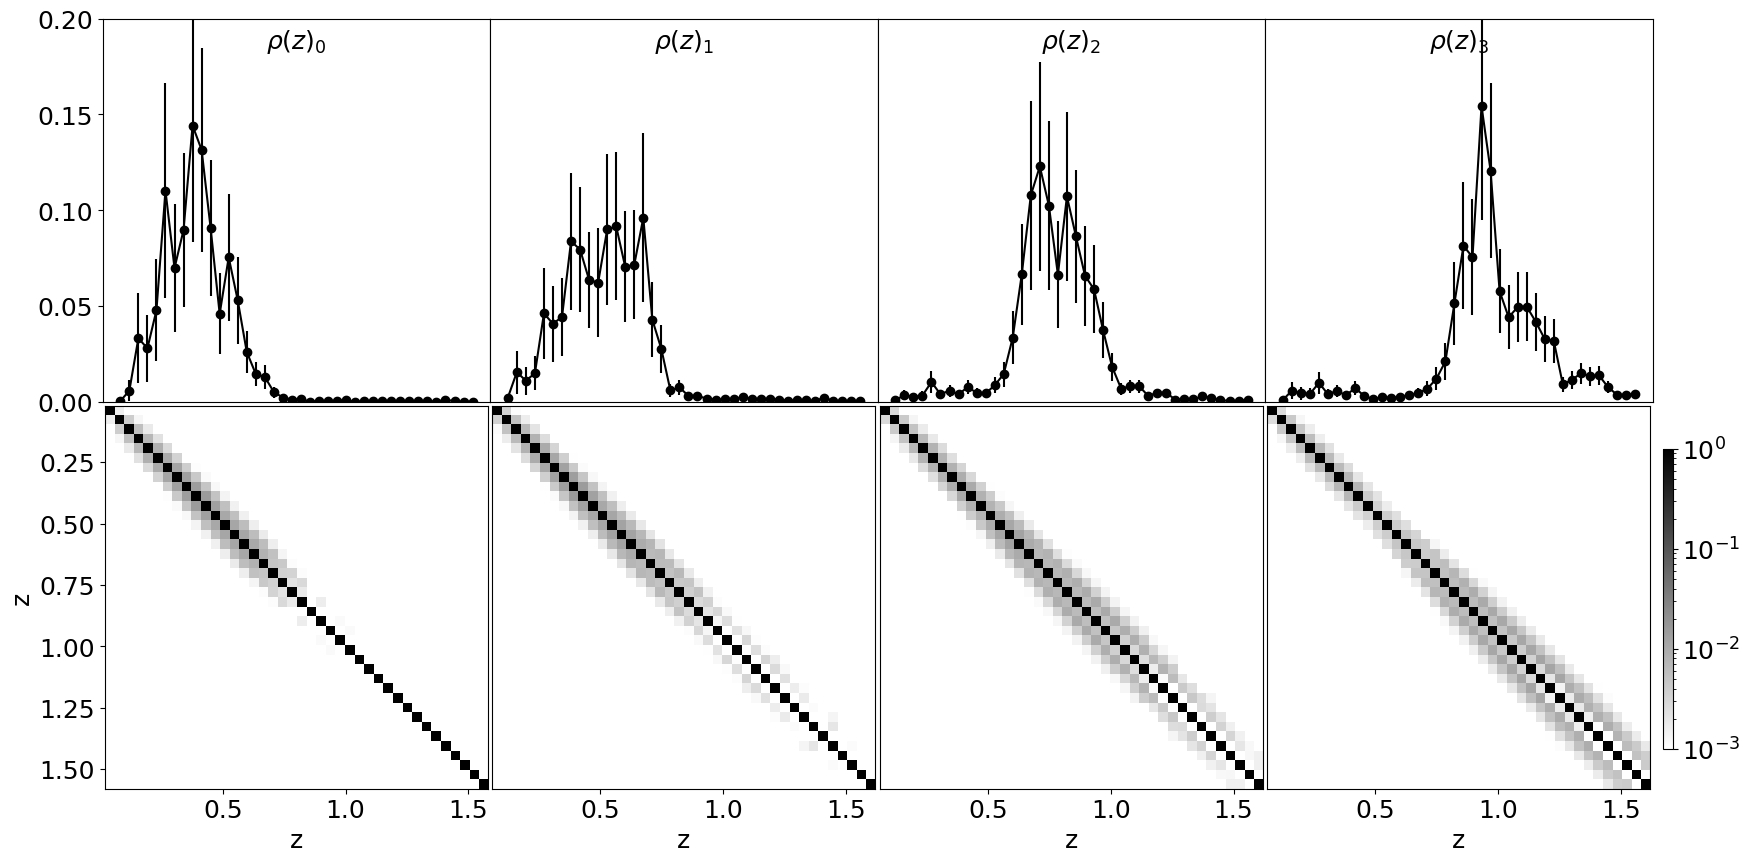

In [72]:
from matplotlib.colors import LogNorm
colorss = ["k", "k", "k", "k"]
figure, axis = plt.subplots(2, 4, figsize=(20,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(0, len(nzs_covs.keys())):
    nzzs = nzs["DESY1wl__{}".format(i)]
    axis[0 , i].errorbar(nzzs['z'], nzzs['dndz'],
             yerr=np.sqrt(np.diag(nzzs["cov"])), fmt='{}o-'.format(colorss[i]), label="$DESY1wl_{}$".format(i))
    axis[0, i].set_ylim(0, 0.2)
    axis[0, i].set_title(r"$\rho(z)_{}$".format(i), y=0.9)
    axis[0, i].set_xticks([])
    if i > 0:
        axis[0, i].set_yticks([])
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nzs[cov]["z"]
    err = np.sqrt(np.diag(nzs[cov]["cov"]))
    corr = nzs[cov]["cov"] / (np.outer(err, err))
    im = axis[1, i].imshow(abs(corr), cmap='gray_r', norm=LogNorm(vmin=0.001, vmax=1),
                           extent=[min(z), max(z), max(z), min(z)])
    if i > 0:
        axis[1, i].set_yticks([])
    else:
        axis[1, i].set_ylabel("z")
    axis[1, i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.005, 0.3])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

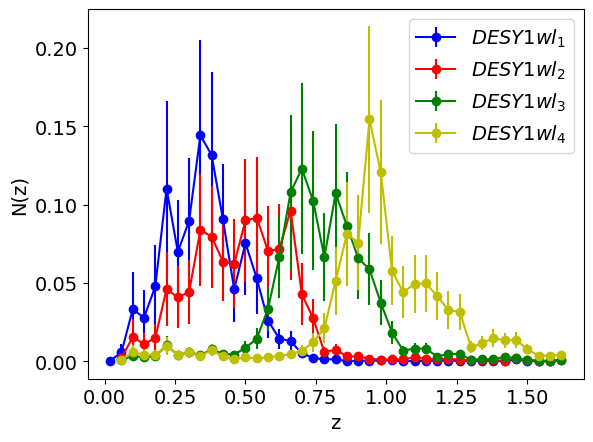

In [13]:
plt.errorbar(nzs["DESY1wl__0"]['z'], nzs["DESY1wl__0"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__0"]["cov"])), fmt='bo-', label="$DESY1wl_1$")
plt.errorbar(nzs["DESY1wl__1"]['z'], nzs["DESY1wl__1"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__1"]["cov"])), fmt='ro-', label="$DESY1wl_2$")
plt.errorbar(nzs["DESY1wl__2"]['z'], nzs["DESY1wl__2"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__2"]["cov"])), fmt='go-', label="$DESY1wl_3$")
plt.errorbar(nzs["DESY1wl__3"]['z'], nzs["DESY1wl__3"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__3"]["cov"])), fmt='yo-', label="$DESY1wl_4$")
plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/binned_covs.pdf', bbox_inches='tight',  pad_inches=0)

## GCGC case

In [14]:
s = sacc.Sacc().load_fits("../../data/FD/cls_FD_covG.fits")
z_DESgc__0_0 = s.tracers["DESgc__0"].z
dndz_DESgc__0_0 = s.tracers["DESgc__0"].nz
z_DESgc__1_0 = s.tracers["DESgc__1"].z
dndz_DESgc__1_0 = s.tracers["DESgc__1"].nz
z_DESgc__2_0 = s.tracers["DESgc__2"].z
dndz_DESgc__2_0 = s.tracers["DESgc__2"].nz
z_DESgc__3_0 = s.tracers["DESgc__3"].z
dndz_DESgc__3_0 = s.tracers["DESgc__3"].nz
z_DESgc__4_0 = s.tracers["DESgc__4"].z
dndz_DESgc__4_0 = s.tracers["DESgc__4"].nz

nz_DESgc__0_0 = (z_DESgc__0_0[5:45], dndz_DESgc__0_0[5:45] / np.sum(dndz_DESgc__0_0[5:45]))
nz_DESgc__1_0 = (z_DESgc__1_0[20:60], dndz_DESgc__1_0[20:60] / np.sum(dndz_DESgc__1_0[20:60]))
nz_DESgc__2_0 = (z_DESgc__2_0[30:70], dndz_DESgc__2_0[30:70] / np.sum(dndz_DESgc__2_0[30:70]))
nz_DESgc__3_0 = (z_DESgc__3_0[50:90], dndz_DESgc__3_0[50:90] / np.sum(dndz_DESgc__3_0[50:90]))
nz_DESgc__4_0 = (z_DESgc__4_0[65:105], dndz_DESgc__4_0[65:105] / np.sum(dndz_DESgc__4_0[65:105]))

In [15]:
cov_DESgc__0_0 = np.diag((0.4*nz_DESgc__0_0[1] + 5e-04)**2)
cov_DESgc__1_0 = np.diag((0.4*nz_DESgc__1_0[1] + 5e-04)**2)
cov_DESgc__2_0 = np.diag((0.4*nz_DESgc__2_0[1] + 5e-04)**2)
cov_DESgc__3_0 = np.diag((0.4*nz_DESgc__3_0[1] + 5e-04)**2)
cov_DESgc__4_0 = np.diag((0.4*nz_DESgc__4_0[1] + 5e-04)**2)

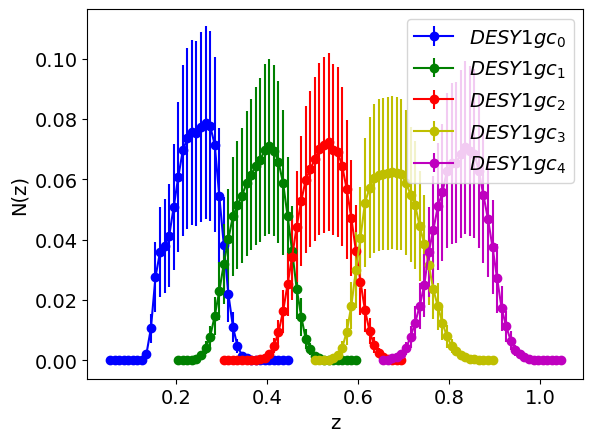

In [16]:
plt.errorbar(nz_DESgc__0_0[0], nz_DESgc__0_0[1],
             yerr=np.sqrt(np.diag(cov_DESgc__0_0)),
             fmt='bo-', label="$DESY1gc_0$")

plt.errorbar(nz_DESgc__1_0[0], nz_DESgc__1_0[1],
             yerr=np.sqrt(np.diag(cov_DESgc__1_0)),
             fmt='go-', label="$DESY1gc_1$")

plt.errorbar(nz_DESgc__2_0[0],  nz_DESgc__2_0[1],
             yerr=np.sqrt(np.diag(cov_DESgc__2_0)),
             fmt='ro-', label="$DESY1gc_2$")

plt.errorbar(nz_DESgc__3_0[0], nz_DESgc__3_0[1],
             yerr=np.sqrt(np.diag(cov_DESgc__3_0)),
             fmt='yo-', label="$DESY1gc_3$")

plt.errorbar(nz_DESgc__4_0[0], nz_DESgc__4_0[1],
             yerr=np.sqrt(np.diag(cov_DESgc__4_0)),
             fmt='mo-', label="$DESY1gc_4$")

plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

In [17]:
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESgc__0_0.npz".format(m),
         z=nz_DESgc__0_0[0], dndz=nz_DESgc__0_0[1], cov=cov_DESgc__0_0)
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESgc__1_0.npz".format(m),
         z=nz_DESgc__1_0[0], dndz=nz_DESgc__1_0[1], cov=cov_DESgc__1_0)
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESgc__2_0.npz".format(m),
         z=nz_DESgc__2_0[0], dndz=nz_DESgc__2_0[1], cov=cov_DESgc__2_0)
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESgc__3_0.npz".format(m),
         z=nz_DESgc__3_0[0], dndz=nz_DESgc__3_0[1], cov=cov_DESgc__3_0)
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESgc__4_0.npz".format(m),
         z=nz_DESgc__4_0[0], dndz=nz_DESgc__4_0[1], cov=cov_DESgc__4_0)

In [18]:
nzs = {"DESY1gc__0": np.load("../../data/DESY1/binned_40_nzs/nz_DESgc__0_0.npz"), 
       "DESY1gc__1": np.load("../../data/DESY1/binned_40_nzs/nz_DESgc__1_0.npz"),
       "DESY1gc__2": np.load("../../data/DESY1/binned_40_nzs/nz_DESgc__2_0.npz"),
       "DESY1gc__3": np.load("../../data/DESY1/binned_40_nzs/nz_DESgc__3_0.npz"),
       "DESY1gc__4": np.load("../../data/DESY1/binned_40_nzs/nz_DESgc__4_0.npz")}

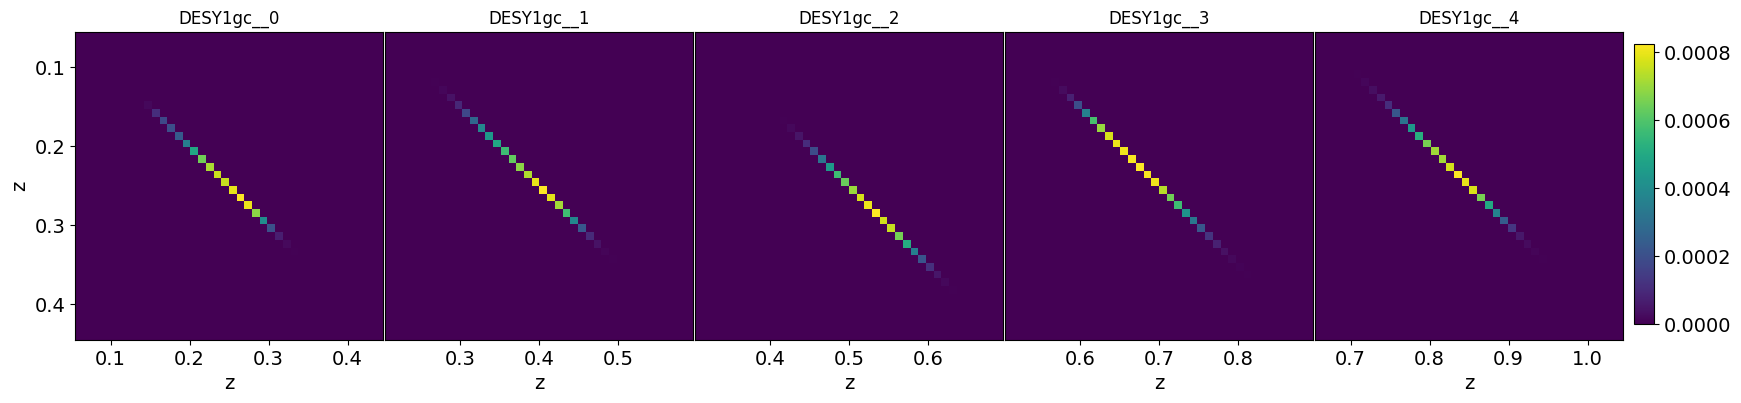

In [19]:
figure, axis = plt.subplots(1, 5, figsize=(20,4))
figure.subplots_adjust(wspace=0)
for i in range(0, len(nzs.keys())):
    cov = list(nzs.keys())[i]
    z = nzs[cov]["z"]
    im = axis[i].imshow(np.log(1+nzs[cov]["cov"]), extent=[min(z), max(z), max(z), min(z)])
    axis[i].set_title(cov)
    if i > 0:
        axis[i].set_yticks([])
    else:
        axis[i].set_ylabel("z")
    axis[i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.01, 0.7])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)